# Introduction:

In this notebook, we will conduct a time series analysis for the champagne company, that is pierre-ferre (a Switzerland based company).

It will help this firm to make a forecast about its future sales so that it can work on inventory and demand requirements.  As a result, it will be able to optimize its costs leading to a maximization of its profits.

We will using  its champagne sales [data](https://docs.google.com/spreadsheets/d/1cKOPGH4PPCLm5PV3XPCLHAp1YlYQGNJU/edit?usp=sharing&ouid=104083810998656045104&rtpof=true&sd=true) from 1964-72 given in millions
  

To achieve it , we will aply time series  techniques such as ARIMA, SARIMAX to arrive at the forecast for its future sales.


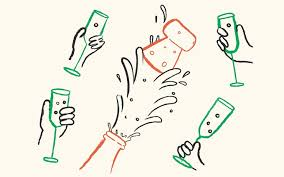


# Loading and Exploring the data



In this step, we will first load the dataset and then, conduct the basic exploration about the dataset such as describe about the sales column and presence of null values.

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set_style('darkgrid')
# ignore warnings
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# using upload method of files (from google.colab)
from google.colab import files
uploaded = files.upload()

Saving Champagne_sales.xlsx to Champagne_sales.xlsx


In [4]:
# import the file
df = pd.read_excel(io.BytesIO(uploaded['Champagne_sales.xlsx']))

In [5]:
# number of colums and rows
print("There are {} number of rows and {} number of columns in the dataset".format(df.shape[0],df.shape[1]))

There are 108 number of rows and 2 number of columns in the dataset


In [6]:
# look at the head
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
# look at the tail
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,NaN,NaN
107,Perrin Freres monthly champagne sales millions...,NaN


* The given data shows the monthly sales of champagne for the Perrin Freres , A Swizerland based firm, for the period between 1964 and 1972.

* If you observe the last three rows, you will find it either null or useful information.

* The column related to perrin freres looks long, lets make it short and equal to sales.


In [8]:
# look at the presence of null values
df.isnull().sum()

Month                                                     2
Perrin Freres monthly champagne sales millions ?64-?72    3
dtype: int64

There are some null values , more importantly, last three rows, seem to have no role in this time series data.

In [9]:
# removing 105,106,107
df.drop([105,106,107],inplace=True)

In [10]:
# rename the pierre to sales only
df.rename(columns = {'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)
# ['Perrin Freres monthly champagne sales millions ?64-?72'].rename('Sales',inplace=True)



In [11]:
# look at the new and cleaned dataset
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [12]:
# using datatime
df['Month'] =pd.to_datetime(df['Month'])

In [13]:
# setting month as index for a better functioning
df.set_index('Month',inplace=True)

In [14]:
# look at the describe of sales
df['Sales'].describe()

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64

* On average , there is 4761 millions of sales. However, looking from 25 percentile to max,  you will see a rise in the sales over time. It shows the increasing trend of sales


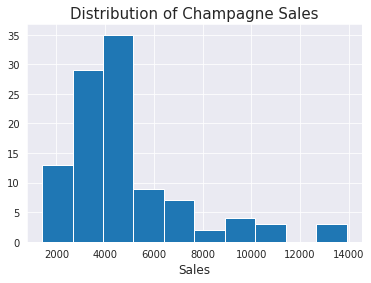

In [15]:
# histogram to show the distribution of sales
df.hist()
plt.title("Distribution of Champagne Sales",fontsize=15)
plt.xlabel("Sales",fontsize=12)
plt.show()

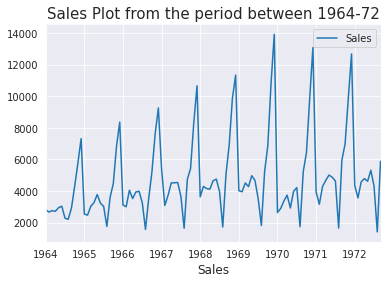

In [16]:
# plotting the time series data
df.plot()
plt.title("Sales Plot from the period between 1964-72",fontsize=15)
plt.xlabel("Sales",fontsize=12)
plt.show()

From the above, we can find the following insights:

* There appears to have an increasing trend of sales started from 2500 around to reaching 14000.

* A multiplicative seasonality of sales. that is at year starting , sales seems to be low (due to non-season) and rising to reach at its peak at the year end.

# Decomposing in action

We will make use of seasonal_decompose function from statsmodels which includes at least two parameters:

x: array — your time series.
model: str — type of seasonal component, can be either additive or multiplicative



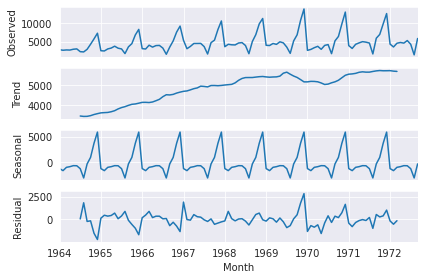

In [17]:
#  using seasonal_decompose of the statsmodels
# first we will see the additive way of decomposition
decomposed = seasonal_decompose(df['Sales'],model='additive')
decomposed.plot();

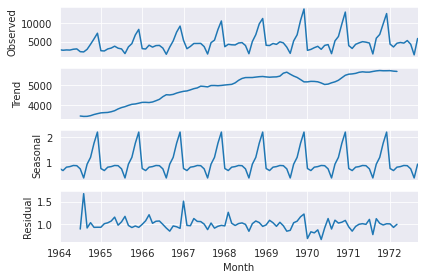

In [18]:
# using multiplicative way of decomposition
decomposed = seasonal_decompose(df['Sales'],model='multiplicative')
decomposed.plot();

If we look at the residuol plots for both

* On average, the residuals are around zero (something up and sometimes down) for the additive way of decomposing. While the residuals appear to be positive for the multiplicative way of decomposing.

* As a result, we will go ahead with the additive nature of decomposing.

# Testing for Stationary

In time series , stattionery is an important concept as all time series are required to be stationery before having any forecasting.

For this, we will conduct an adfuller test.For this, we will have the following null and alterate:

Ho: time series is non-stationary
Ha : time series is stationary



In [19]:
# import adfuller

from statsmodels.tsa.stattools import adfuller
# defining a function related to it
def stat_test(sales):
  result = adfuller(sales)
  labels =['ADF test Statistic', 'p-value', 'lags used','Number of Observations']

  for x,y in zip(result, labels):
    print(y+":"+ str(x))
  if result[1] < 0.05:
    print("We reject the null hypothesis that there is no statinary that is the time series is a stationary ")
  else:
    print("We fail to reject the null hypothesis ,time series is a non-stationary") 

In [20]:
stat_test(df['Sales'])

ADF test Statistic:-1.8335930563276188
p-value:0.363915771660247
lags used:11
Number of Observations:93
We fail to reject the null hypothesis ,time series is a non-stationary


# Making the time series stationery

There are multiple ways of transforming the a non-stationary series into stationary:

* Differencing

* Scale transformation : Using log or sqaure root of the data



If we look at the given time series , it appears that the given time series is seasonal in nature (that is value at present value relies more on the value last year or lag12)

Due to this, we will take the difference with the sales at lag 12.


In [21]:
# shifting the value by the 1 lag and 
df['First Sales difference'] = df['Sales'] - df['Sales'].shift(1)
# shifting the value by 12 lag
df['Seasonal Sales difference'] = df['Sales'] - df['Sales'].shift(12)

In [22]:
# loking the dataset
df.head()

,Sales,First Sales difference,Seasonal Sales difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [23]:
# using adf fuller test on both first and 12 sales
print(stat_test(df['First Sales difference'].dropna()))

ADF test Statistic:-7.189896448051
p-value:2.519620447387081e-10
lags used:11
Number of Observations:92
We reject the null hypothesis that there is no statinary that is the time series is a stationary 
None


In [24]:
print(stat_test(df['Seasonal Sales difference'].dropna()))

ADF test Statistic:-7.626619157213166
p-value:2.0605796968136632e-11
lags used:0
Number of Observations:92
We reject the null hypothesis that there is no statinary that is the time series is a stationary 
None


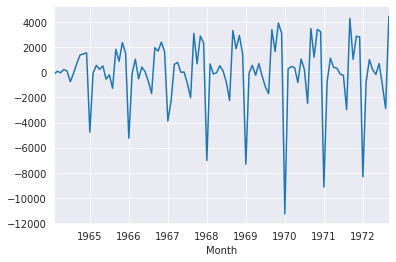

In [25]:
# plotting both first difference and seasonal difference
df['First Sales difference'].dropna().plot()

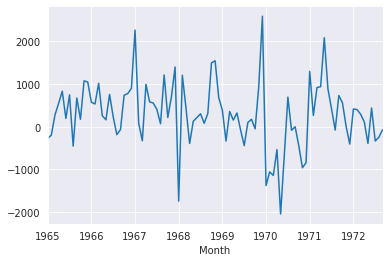

In [26]:
df['Seasonal Sales difference'].dropna().plot()

Both first and 12th(or seasonal ) are stationary. However, it seems quite obvious from their respective plot that first difference has more of variations over time compared to 12th (or seasonal one)

So, we will go ahead with the seansable sales difference for further forecasting.

# ACF and PACF

ACF, stands or auto correlation, shows the correlation between the present(n ) values with its lagged value(n-k), without accounting for the correlation provided by the middle k values. 


PACF , partial autocorrelation, exhibits the correlation betweenthe present(n ) values with its lagged value(n-k), after accounting for the correlation provided by the middle k values. 




# ARIMA model

It is a major model used to forecast the values in case of a time series.It has mainly two components:


* AR  : Focus on predicting the current value based on its lagged value
* I: It is the focus on the differencing of the original data to make it stattionary
* MA: Focus on making the future prediction based on the errors committed in the past. That is, it is based on the regression on the errors.



Identification of an AR model is often best done with the PACF.

* For an AR component, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA component , the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags



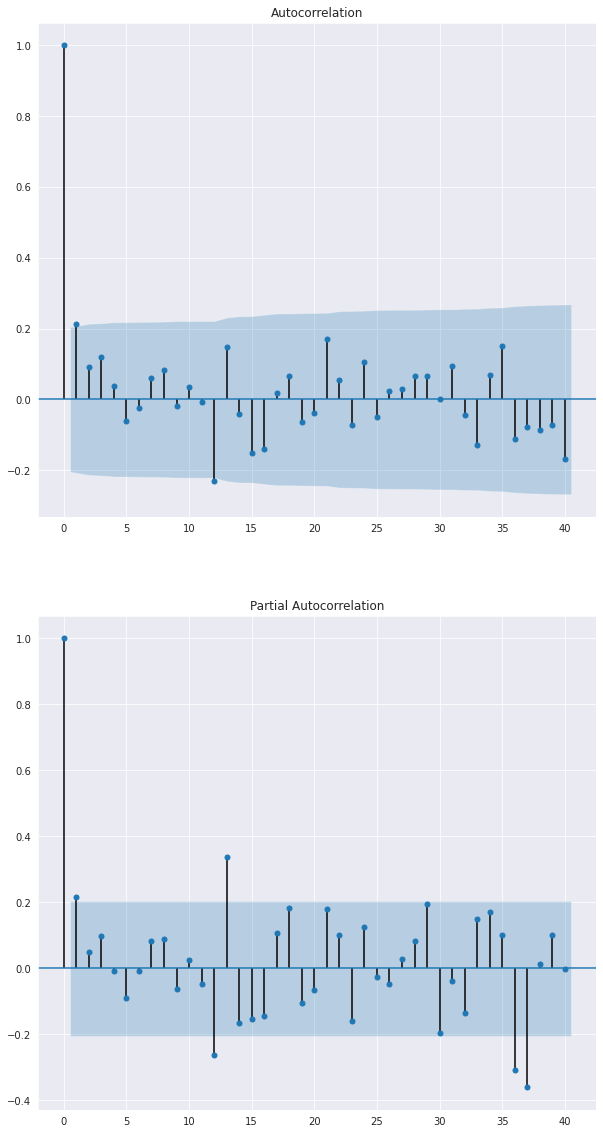

In [27]:
#importing the required method plot_acf, plot_pacf

from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
# plotting
fig  = plt.figure(figsize =(10,20))
ax1 =fig.add_subplot(211)

plot_acf(df['Seasonal Sales difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal Sales difference'].iloc[13:],lags=40,ax =ax2)
plt.show()

Based on the above plots , we have found that:

* PACF has shut-off (or fallen permanently) after the first lagged value. Although there are some other lags that are significant (that are usually every 12th lag). Since they are rather, we will use 1 lag value for AR component of ARIMA.

* Since we have done differencing once only, the I component of ARIMA model would be one.


* Similarly , for the MA component of ARIMA model, we make use of ACF plot. Based on the ACF plot, we have found that it has fallen sharply after 1st lagged and hardly , you can see other lag as significant. So, we will use 1 lag value for MA component of ARIMA model.

# Train and Test data


Now, we will divide the dataset into training and test data for the purpose of forecasting our sales. Put it simply, we will simply make use of train data to build a baseline model and then, use this model to see its performance on test data.

Based on the performance on test data (can be decided by errors average) , we will determine the desirability of the ARIMA model built.

In [28]:
# test and train data : last 24 months (that is 20 percent of the entire date is kept for the test)
df_train = df['Sales'].iloc[:-24]
df_test = df['Sales'].iloc[-24:]

In [29]:
print("There are {} number of samples in training data".format(len(df_train)))
print("There are {} number of samples in test data".format(len(df_test)))

There are 81 number of samples in training data
There are 24 number of samples in test data


In [30]:
df_train

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1970-05-01    2927.0
1970-06-01    3986.0
1970-07-01    4217.0
1970-08-01    1738.0
1970-09-01    5221.0
Name: Sales, Length: 81, dtype: float64

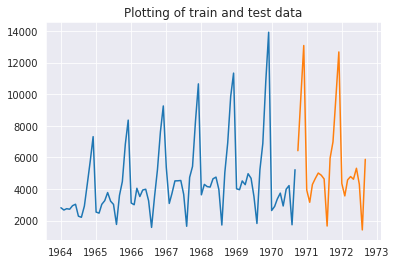

In [31]:
# plotting both train and test
plt.plot(df_train)
plt.plot(df_test)
plt.title("Plotting of train and test data")
plt.show()

# Using the ARIMA model

From the above analysis, we can make use of ARIMA (p,d,q) with the following parameters values:

* p = 1
* d = 1
* q = 1

In [32]:
# import ARIMA
from statsmodels.tsa.arima_model import ARIMA
model  = ARIMA(df_train,order = (1,1,1))
fit_model = model.fit(disp=-1);

In [33]:
# model summary
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -725.586
Method:                       css-mle   S.D. of innovations           2057.882
Date:                Wed, 27 Jul 2022   AIC                           1459.171
Time:                        18:39:44   BIC                           1468.699
Sample:                    02-01-1964   HQIC                          1462.991
                         - 09-01-1970                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.5448     17.415      1.524      0.132      -7.588      60.678
ar.L1.D.Sales     0.4554      0.101      4.509      0.000       0.257       0.653
ma.L1.D.Sales    -1.0000      0.034    -29.321      0.000      -1.067      -0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1960           +0.0000j            2.1960            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Insights:

* The model attained the AIC and BIC of around 1400.

In [34]:
# show the prediction on train
forecast_train =fit_model.predict()
# predict on test
forecast_test =fit_model.predict(start=81,end=105,dynamic=True)

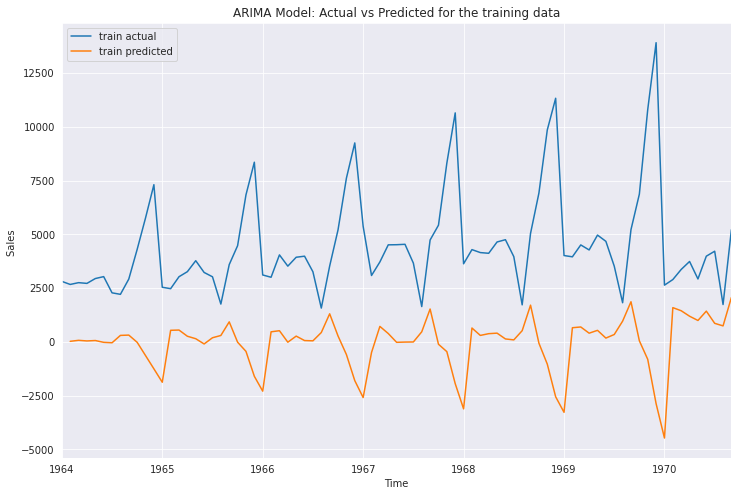

In [35]:
# predict on train

df_train.plot(label='train actual')

forecast_train.plot(figsize=(12,8),label='train predicted')
plt.xlabel('Time')
plt.ylabel('Sales ')
plt.title('ARIMA Model: Actual vs Predicted for the training data')

plt.legend()


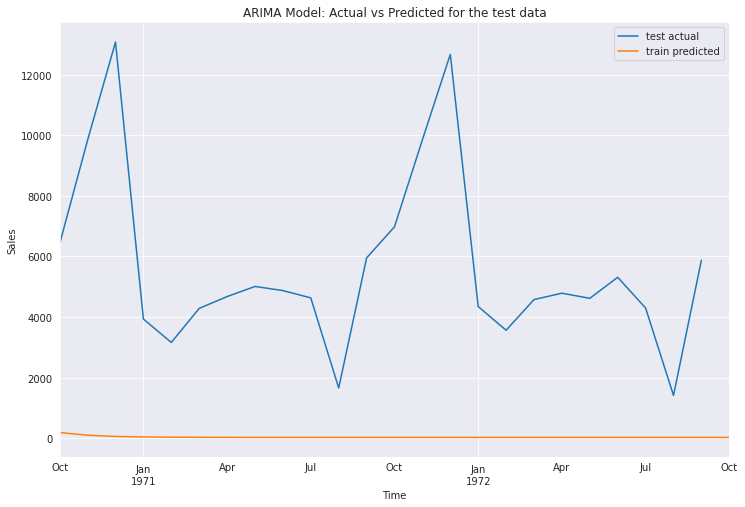

In [37]:
# predict on test data

df_test.plot(label='test actual')

forecast_test .plot(figsize=(12,8),label='train predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('ARIMA Model: Actual vs Predicted for the test data')

plt.legend()

 Insights:

 * Although the model did somewhat a  decent job in training data, it failed to give a decent performance for the test data. If we look at the data , we will find out that it has some seasnality which make cause its predict to falter on test data. Let us now try on SARIMAX model which counters or work on the data with seasonality.

# SARIMAX Model

This model will cover the seasonality along with the other components of ARIMA.  Also, we will use an advanced version of it which is caled SARIMAX model which covers for exogenous factors.

In [38]:
# using sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
# using it with order and seasonal_order
model = SARIMAX(df_train,order=(1,1,1),seasonal_order=(1,1,1,12))
result =model.fit()


In [40]:
# summary of results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   81
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -550.439
Date:                            Wed, 27 Jul 2022   AIC                           1110.877
Time:                                    18:41:10   BIC                           1121.975
Sample:                                01-01-1964   HQIC                          1115.274
                                     - 09-01-1970                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2145      0.117      1.837      0.066      -0.014       0.443
ma.L1         -0.9253      0.072    -12.906      0.000      -1.066      -0.785
ar.S.L12      -0.6022      0.577     -1.043      0.297      -1.733       0.529
ma.S.L12       0.4746      0.594      0.799      0.424      -0.689       1.638
sigma2      5.717e+05   8.24e+04      6.938      0.000     4.1e+05    7.33e+05
===================================================================================
Ljung-Box (Q):                       48.18   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.18   Prob(JB):                         0.04
Heteroskedasticity (H):               3.13   Skew:                            -0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

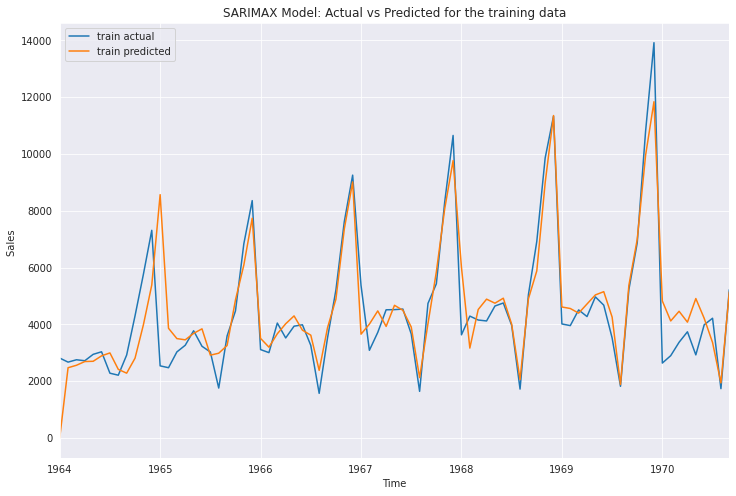

In [41]:
# train data prediction
forecast_train = result.predict()

# plotting and comparing both on train

df_train.plot(label='train actual')

forecast_train.plot(figsize=(12,8),label='train predicted')
plt.xlabel('Time')
plt.ylabel('Sales ')
plt.title('SARIMAX Model: Actual vs Predicted for the training data')

plt.legend()


# Predict the next 24 months Sales

Now, we will make use of the developed model to make a prediction of the sales for the next 24 months and then evaluate it with the actual values to see its performance.

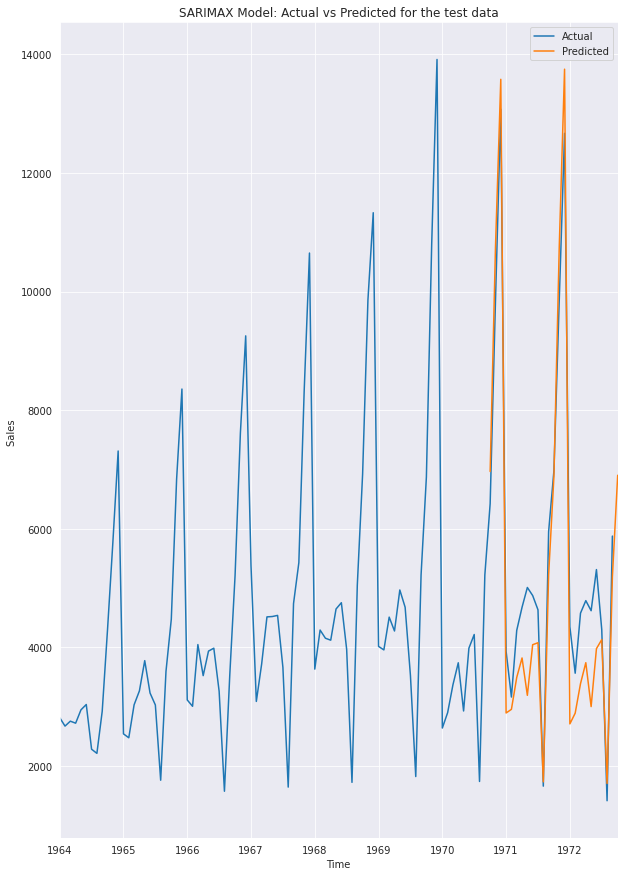

In [44]:
forecast = result.predict(start=81,end=105)
df['Sales'].plot(figsize=(10,15),label ='Actual')
forecast.plot(label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sales ')
plt.title('SARIMAX Model: Actual vs Predicted for the test data')

plt.legend()

#  Conclusion:

We started our analysis with a **basic exploration** of the dataset. It helped in determining some important facts of dataset like presence of trend and seasonality in the dataset. We discovered that the given time series has some **positive trend and seasonality** in it.



After this, we began building baseline models : ARIMA model. We found that its AR, I, and  MA components are 1,1 and 1 respectively, thanks to use of PACF , first differencing and ACF plots respectively. 


However, it did not deliver well on the test data due to seasonality in the main dataset (as seasonality is not covered by the stationery). Consequently, we deployed **SARIMAX**  model which not cover seasonality but also cover the exogenous component of the data. It did a much **excellent job** thanks to AIC of around 1110 (30 percent less error than that of ARIMA model).



### References:

* https://www.statsmodels.org/stable/tsa.html

* https://en.wikipedia.org/wiki/Time_series






